# Цель работы

Изучение связи между признаками двумерного набора данных, визуализация данных.
# Вариант задания

Вариант №9.

Набор данных: visits2.csv.

Данные пользовательских сессии магазина:
1. уникальный идентификатор пользователя;
2. страна пользователя;
3. устройство пользователя;
4. идентификатор рекламного источника, из которого пришел пользователь;
5. дата и время начала сессии;
6. дата и время окончания сессии;
7. время сессии в минутах;
8. кол-во кликов пользователя;
9. количество товаров в корзине;
10. стоимость покупок;
11. возраст пользователя.
# Ход выполнения работы
### 1. Чтение файла

Перед началом работы необходимо прочитать таблицу и преобразовать в датафрейм. Для этого была подключена библиотека Pandas, с помощью которой воспроизводилось чтение файла. Также были подключены библиотеки matplotlib и seaborn. Они необходимы для построения гистограмм. 

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv('./visits2.csv', sep = ";")

### 2. Обзор данных

Затем была просмотрена основная информация о данных с помощью команды *info()*. Таблица содержит 954 записи и 11 столбцов. Пропуски присутствуют только в двух столбцах - region и device (по одному отсутствующему значению в каждом), что несущественно и не повлияет на дальнейший анализ. Большинство данных заполнено полностью.
Типы данных распределены следующим образом:
- Числовые (float64) - 4 столбца: time_session, click_count, buy_count, price;
- Целочисленные (int64) - 2 столбца: user_id, age;
- Текстовые (object) - 5 столбцов: region, device, channel, session_start, session_end.

Таким образом, данные находятся в хорошем состоянии, отсутствует значительное количество пропусков, типы данных определены корректно, что позволяет переходить к этапу очистки и анализа поведения пользователей.

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 954 entries, 0 to 953
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   user_id        954 non-null    int64  
 1   region         953 non-null    object 
 2   device         953 non-null    object 
 3   channel        954 non-null    object 
 4   session_start  954 non-null    object 
 5   session_end    954 non-null    object 
 6   time_session   954 non-null    float64
 7   click_count    954 non-null    float64
 8   buy_count      954 non-null    float64
 9   price          954 non-null    float64
 10  age            954 non-null    int64  
dtypes: float64(4), int64(2), object(5)
memory usage: 82.1+ KB


Также был проведён анализ данных с помощью команды *describe()*. Для примера рассмотрим показатель time_session - время сессии пользователя. В среднем оно составляет 29 минут, при этом стандартное отклонение равно 27.1, что указывает на значительный разброс значений. Минимальное время равно 0 минут, а максимальное достигает 262, что говорит о наличии как очень коротких, так и крайне длительных сессий. Медианное значение (Q2) — 21 минута, а первый и третий квартиль (Q1 = 9, Q3 = 42) показывают, что половина пользователей проводит в системе от 9 до 42 минут. Таким образом, можно отметить, что распределение времени сессий неравномерное и имеет смещение в сторону коротких сессий.

In [7]:
df.describe()

,user_id,time_session,click_count,buy_count,price,age
count,9.540000e+02,954.000000,954.000000,954.000000,954.000000,954.000000
mean,4.951807e+11,29.062893,9.830189,2.527254,5341.559748,39.810273
std,2.899488e+11,27.134816,9.209039,1.602003,5060.247685,13.038029
min,2.346325e+09,0.000000,0.000000,0.000000,0.000000,10.000000
25%,2.295122e+11,9.000000,3.000000,2.000000,2301.000000,29.000000
50%,4.984267e+11,21.000000,7.000000,2.000000,3739.000000,39.000000
75%,7.525332e+11,42.000000,14.000000,3.000000,7284.000000,50.000000
max,9.985130e+11,262.000000,88.000000,15.000000,56546.000000,71.000000


### 3. Обработка данных

Далее было просмотрено количество пустых значений. 2 строчки занимают 0.2% данных, что не повлияет на статистику и распределение.

In [8]:
print(df.isna().sum())

user_id          0
region           1
device           1
channel          0
session_start    0
session_end      0
time_session     0
click_count      0
buy_count        0
price            0
age              0
dtype: int64


In [9]:
df = df.dropna()
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 952 entries, 0 to 953
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   user_id        952 non-null    int64  
 1   region         952 non-null    object 
 2   device         952 non-null    object 
 3   channel        952 non-null    object 
 4   session_start  952 non-null    object 
 5   session_end    952 non-null    object 
 6   time_session   952 non-null    float64
 7   click_count    952 non-null    float64
 8   buy_count      952 non-null    float64
 9   price          952 non-null    float64
 10  age            952 non-null    int64  
dtypes: float64(4), int64(2), object(5)
memory usage: 89.2+ KB


Теперь датафрейм имеет 952 строки и не будет содержать пустых значений.

Затем датафрейм был проверен на наличие неявных дубликатов.

In [10]:
print(df['region'].unique(), '\n',
      df['device'].unique(), '\n',
      df['channel'].unique())

['United States' 'Russia' 'USA'] 
 ['iPhone' 'Mac' 'Android' 'PC' 'MAC' 'IPHONE'] 
 ['organic' 'TipTop' 'FaceBoom' 'MediaTornado']


In [11]:
print(df['device'].value_counts())
print(df['region'].value_counts())

device
iPhone     418
Mac        243
Android    185
PC         103
IPHONE       2
MAC          1
Name: count, dtype: int64
region
United States    899
Russia            52
USA                1
Name: count, dtype: int64


Можно видеть ошибки в написании iPhone и Mac, а также Uniter States. Для исправления написания используется команда *replace()*.

In [12]:
df.loc[:, 'device'] = df['device'].replace('IPHONE', 'iPhone')
df.loc[:, 'device'] = df['device'].replace('MAC', 'Mac')
df.loc[:, 'region'] = df['region'].replace('USA', 'United States')
print(df['device'].value_counts())
print(df['region'].value_counts())

device
iPhone     420
Mac        244
Android    185
PC         103
Name: count, dtype: int64
region
United States    900
Russia            52
Name: count, dtype: int64


In [13]:
print(df.duplicated().sum())

0


In [14]:
df.columns = df.columns.str.strip()

По итогу проверки датафрейм не имеет неявных и явных дубликатов и пустых значений, а также названия столбцов теперь корректны. Можно продолжать выполнять работу.

### 4. Построение матрицы диаграмм рассеивания 

Для построения данной диаграммы было необходимо импортировать библиотеку seaborn, построенная на основе matplotlib. Затем был создан список, содержащий столбцы для анализа, где первые три – числовые для изучения, а последний – категориальный для раскраски. На диагонали отображаются гистограммы распределений, а вне - диаграммы рассеяния для каждой пары признаков.

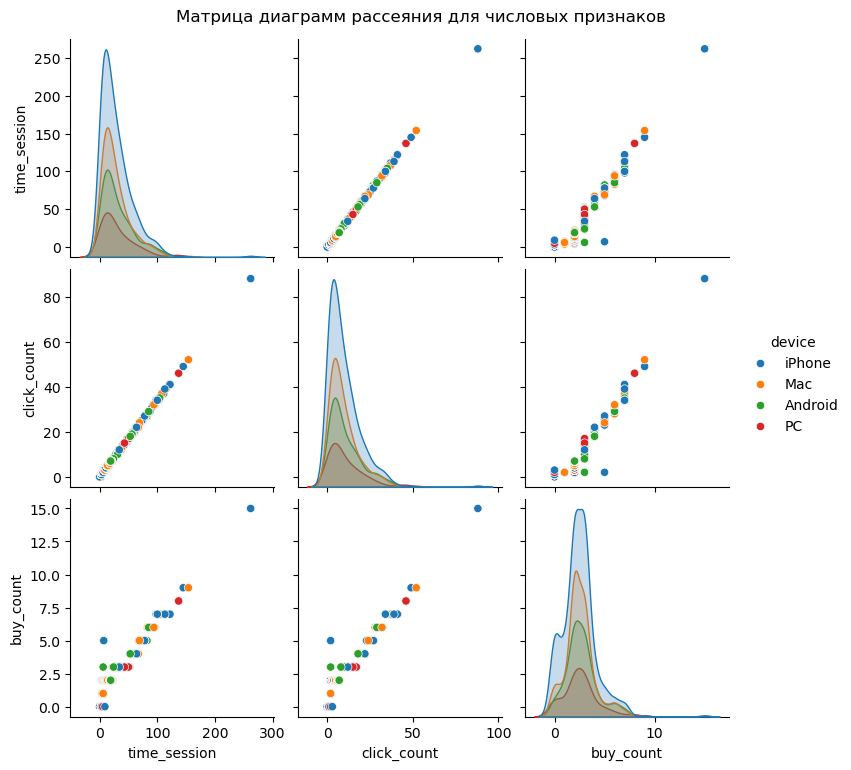

In [15]:
numeric_features = ['time_session', 'click_count', 'buy_count', 'device']  # числовые + категориальный для раскраски
sns.pairplot(df[numeric_features], hue='device')  # hue = категориальный признак
plt.suptitle('Матрица диаграмм рассеяния для числовых признаков', y=1.02)
plt.show()

Диаграммы плотности:
1. Время сессии (time_session): Пик находится в диапазоне 0-100, с быстрым спадом, указывая на преобладание коротких сессий.
2. Количество кликов (click_count): Пик до 50, с резким уменьшением частоты, что говорит о малом числе кликов в большинстве случаев.
3. Количество покупок (buy_count): Пик в диапазоне 0-5, с низкими значениями далее, показывая, что большинство пользователей совершают мало покупок.

Диаграммы рассеяния:
1. Время сессии vs. Количество кликов: Точки показывают рост кликов с увеличением времени сессии, но разброс велик, с преобладанием низких значений.
2. Время сессии vs. Количество покупок: Количество покупок увеличивается с ростом времени сессии, но большинство значений остается низким (до 10).
3. Количество кликов vs. Количество покупок: Покупки растут с увеличением кликов, но данные сосредоточены в низком диапазоне (до 50 кликов и 10 покупок).

### 5. Построение гистограмм для числовых признаков 

Для построения гистограмм числовых признаков были импортированы те же библиотеки, а также библиотека NumPy, чтобы вычислить оптимальное число интервалов по правилу Стерджеса. Для определения размера выборки, который важен для расчёта оптимального числа, вычисляется количество строк в датасете, после чего по формуле происходит итоговый расчёт. Функция *np.ceil()* округляет результат вверх. Итоговое значение обеспечивает баланс между детальностью и читаемостью гистограмм, избегая как слишком грубого, так и избыточного разбиения.
Команда *plt.subplot(2, 3, i + 1)* создаёт сетку подграфиков (subplots) внутри одной фигуры и выбирает, в каком месте разместить текущий график. Функция *plt.tight_layout()* автоматически регулирует расположение подграфиков, чтобы избежать наложения элементов.

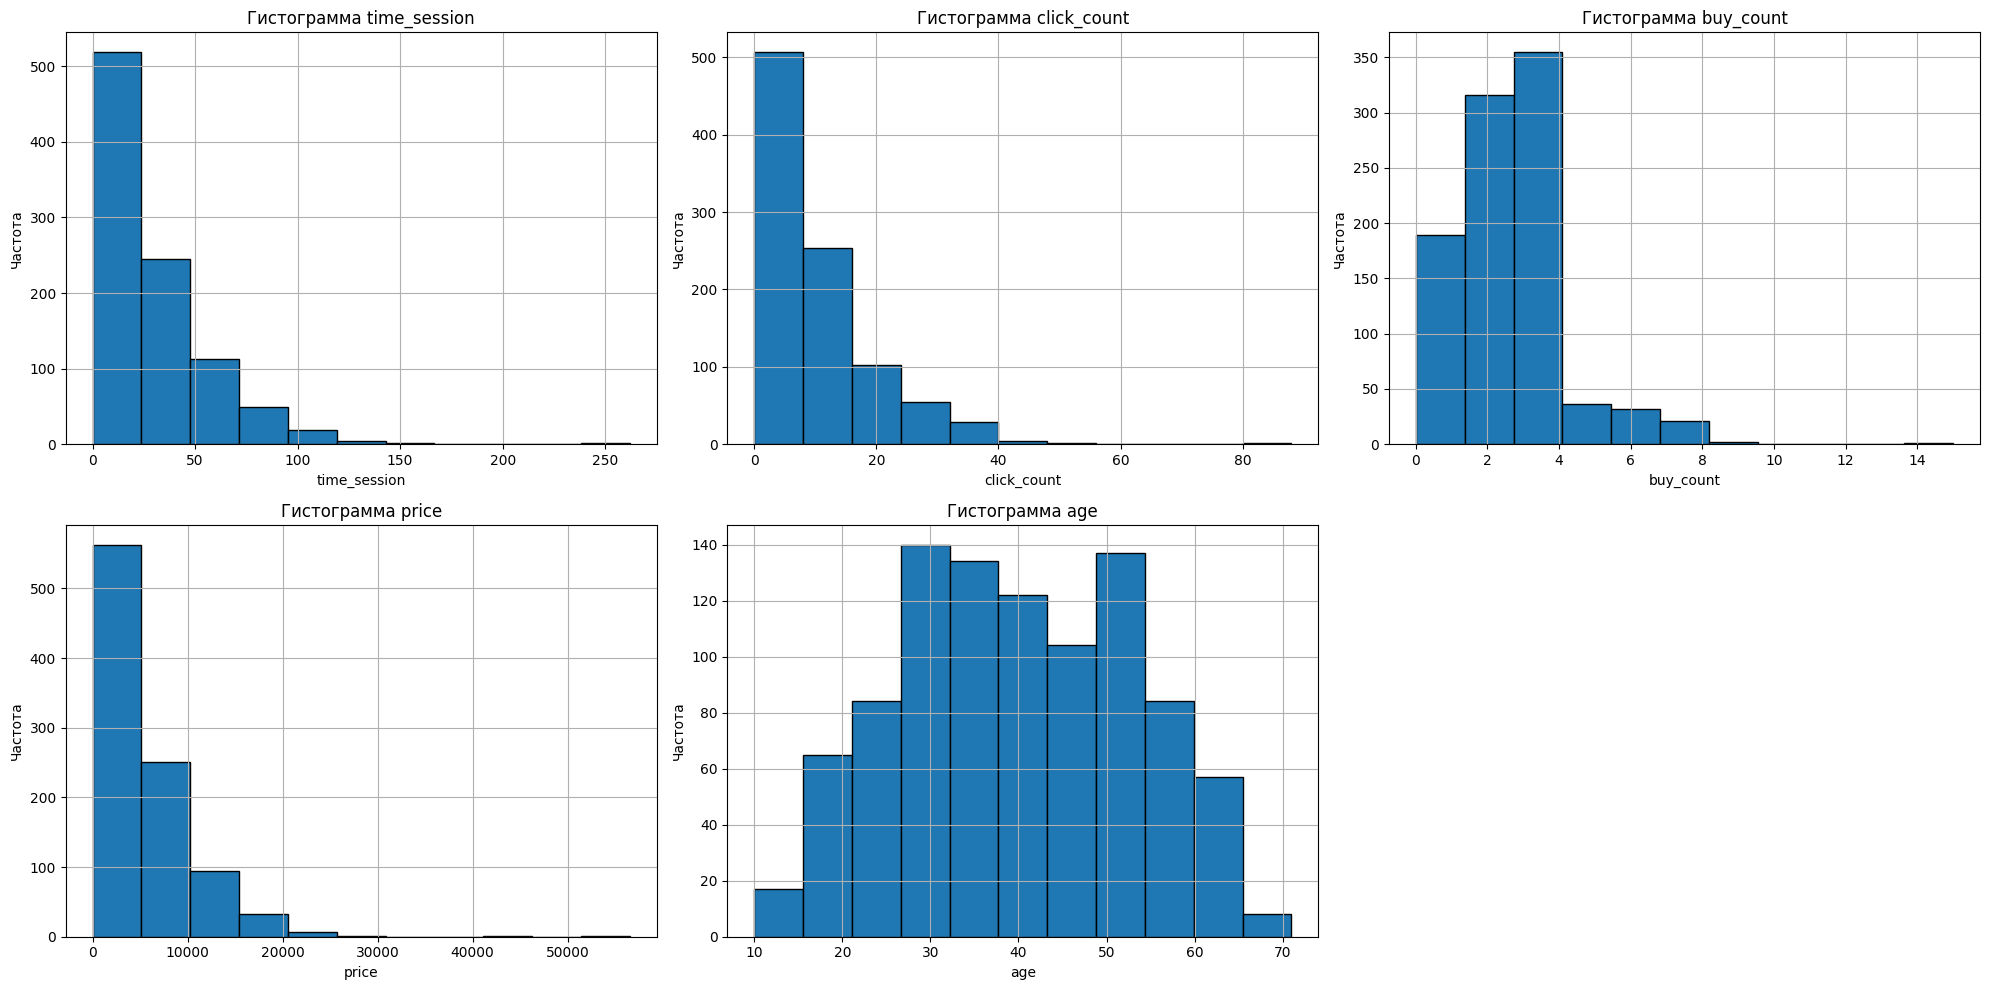

In [87]:
import numpy as np

numeric_features = ['time_session', 'click_count', 'buy_count', 'price', 'age']

n = len(df.dropna())  # количество строк без пропусков
optimal_bins = int(np.ceil(np.log2(n) + 1))  # правило Стёрджеса

plt.figure(figsize=(20, 10))

for i, feature in enumerate(numeric_features):
    plt.subplot(2, 3, i + 1)
    df[feature].hist(bins=optimal_bins, edgecolor='black')
    plt.title(f'Гистограмма {feature}')
    plt.xlabel(feature)
    plt.ylabel('Частота')

plt.tight_layout()
plt.show()

Выводы по диаграммам:
1. Время сессии (time_session): Большинство значений сосредоточено в диапазоне до 50 единиц, с резким спадом после этого. Это указывает на то, что сессии в основном короткие.
2. Количество кликов (click_count): Распределение похоже на предыдущее, с пиком до 20 кликов и быстрым уменьшением частоты. Большинство пользователей совершают небольшое количество кликов.
3. Количество покупок (buy_count): Значения сосредоточены в диапазоне до 6-8 покупок, с постепенным спадом. Большинство пользователей совершают мало покупок за раз.
4. Цена (price): Значения резко падают после 10,000 единиц, что говорит о том, что большинство цен сосредоточено в низком диапазоне, а высокие цены встречаются редко.
5. Возраст (age): Распределение имеет нормальный вид с пиком около 30-40 лет, что указывает на преобладание пользователей среднего возраста.

Общий вывод: данные показывают, что пользователи имеют короткие сессии, совершают немного кликов и покупок, предпочитают товары с низкой ценой, и основная аудитория приходится на средний возрастной диапазон.

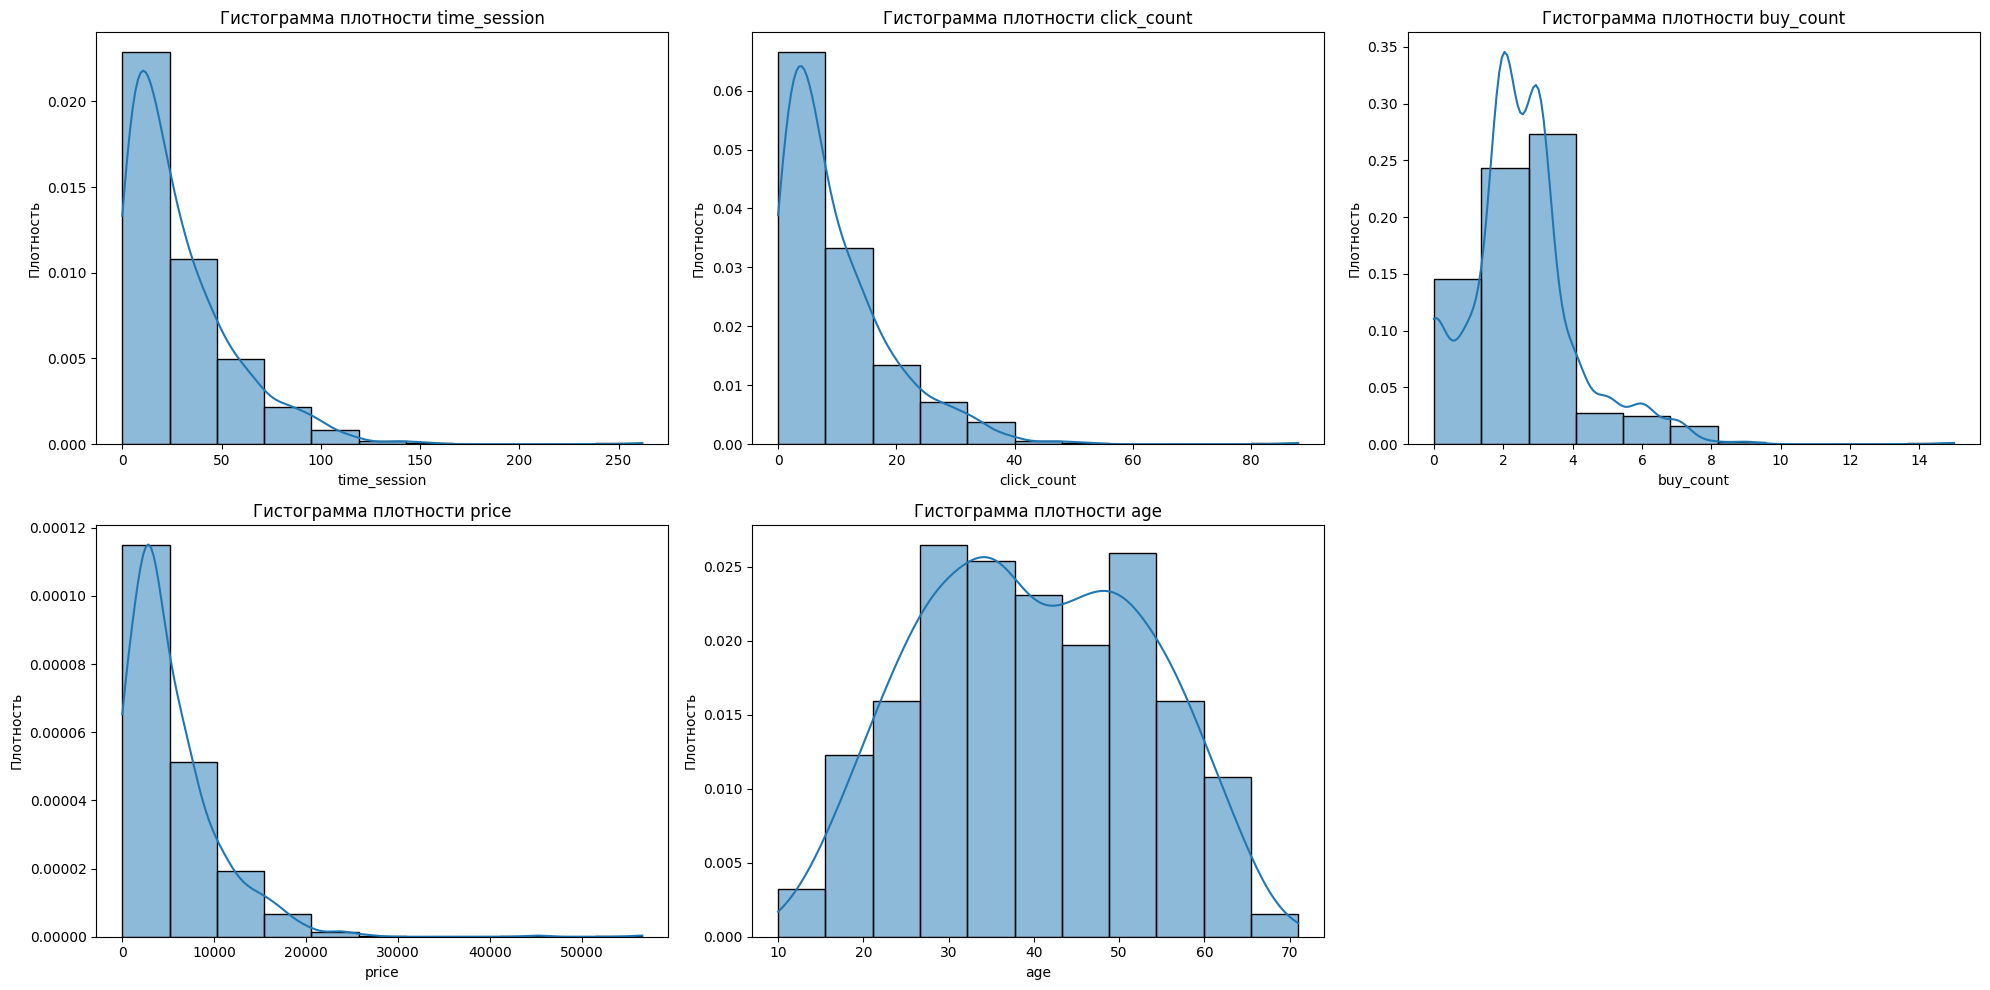

In [94]:
plt.figure(figsize=(20, 10))

for i, feature in enumerate(numeric_features):
    plt.subplot(2, 3, i + 1)
    sns.histplot(df[feature], bins=optimal_bins, kde=True, stat='density', edgecolor='black')
    plt.title(f'Гистограмма плотности {feature}')
    plt.xlabel(feature)
    plt.ylabel('Плотность')

plt.tight_layout()
plt.show()

Из представленных гистограмм плотности можно сделать следующие выводы:

1. Время сессии (time_session): Большая часть значений сосредоточена в диапазоне до 50 единиц, с пиком около 0-20. Это указывает на то, что большинство сессий являются короткими.
2. Количество кликов (click_count): Плотность высока в диапазоне до 20 кликов, с резким спадом после этого. Большинство пользователей совершают небольшое количество кликов.
3. Количество покупок (buy_count): Значения сконцентрированы в диапазоне 0-6 покупок, с пиком около 2-4. Это говорит о том, что большинство пользователей совершают небольшое число покупок.
4. Цена (price): Плотность резко падает после 10,000 единиц, с пиком в низком диапазоне (0-5,000). Большинство цен сосредоточено в нижнем ценовом сегменте.
5. Возраст (age): Распределение имеет нормальный вид с пиком около 30-40 лет, что указывает на преобладание пользователей среднего возраста.

Общий вывод: данные демонстрируют, что пользователи предпочитают короткие сессии, совершают мало кликов и покупок, выбирают товары с низкой ценой, и основная аудитория приходится на возрастной диапазон 30-40 лет.

### 6. Исследование взаимосвязей между переменными

Для расчёта корреляции и ковариации были использованы методы corr() и cov(). Корреляция Пирсона измеряет линейную зависимость между парами признаков (значения от -1 до 1), помогая понять, как, например, время сессии и количество нажатий. Ковариация показывает направление и силу линейной зависимости между признаками: положительная означает совместный рост, отрицательная — рост в противоположных направлениях. Однако значения ковариации зависят от масштаба данных.

Корреляция - это своего рода процент или оценка связи (от -1 до 1), не зависящая от единиц измерения, поэтому её легко интерпретировать. 

Ковариация, напротив, представляет собой «сырое» число, показывающее направление и силу связи, но требующее нормализации для удобства сравнения.

In [46]:
numeric_features = ['time_session', 'click_count', 'buy_count', 'price', 'age']
df_numeric = df[numeric_features]

# Матрица корреляции (коэффициент Пирсона)
correlation_matrix = df_numeric.corr()

# Матрица ковариации
covariance_matrix = df_numeric.cov()

print("Матрица корреляции:\n", correlation_matrix)
print("\nМатрица ковариации:\n", covariance_matrix)

Матрица корреляции:
               time_session  click_count  buy_count     price       age
time_session      1.000000     0.999134   0.946592  0.904684 -0.036263
click_count       0.999134     1.000000   0.948901  0.905477 -0.035136
buy_count         0.946592     0.948901   1.000000  0.873959 -0.035364
price             0.904684     0.905477   0.873959  1.000000 -0.054957
age              -0.036263    -0.035136  -0.035364 -0.054957  1.000000

Матрица ковариации:
                time_session   click_count    buy_count         price  \
time_session     737.776766    250.164783    41.228771  1.244677e+05   
click_count      250.164783     84.972774    14.026065  4.227804e+04   
buy_count         41.228771     14.026065     2.571283  7.098446e+03   
price         124467.713289  42278.037468  7098.446125  2.565634e+07   
age              -12.846377     -4.224153    -0.739578 -3.630582e+03   

                      age  
time_session   -12.846377  
click_count     -4.224153  
buy_count     

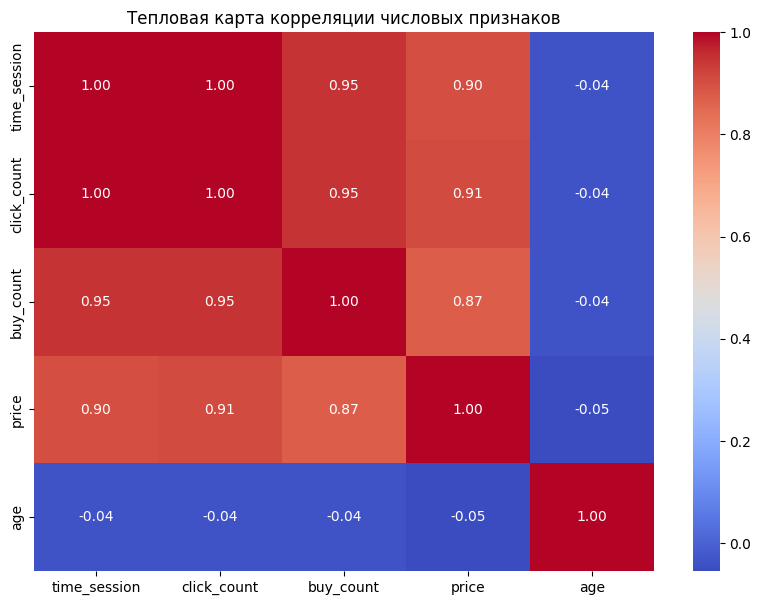

In [47]:
plt.figure(figsize=(10, 7))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Тепловая карта корреляции числовых признаков')
plt.show()

Высокая положительная корреляция:

1. time_session и click_count (1.00) — сильная прямая связь, указывающая, что увеличение времени сессии сильно коррелирует с ростом числа кликов.
2. time_session и buy_count (0.95) — высокая положительная корреляция, что говорит о том, что дольше сессии связаны с большим числом покупок.
3. click_count и buy_count (0.95) — практически полная положительная корреляция, указывающая на то, что большее количество кликов напрямую связано с увеличением покупок.
4. price и buy_count (0.87) — умеренная положительная корреляция, suggesting, что более высокие цены могут быть связаны с большим числом покупок, но связь слабее.

Низкая или отсутствующая корреляция:

1. time_session, click_count, price и buy_count с age (-0.04, -0.04, -0.04, -0.05) — практически нулевая корреляция, что говорит об отсутствии связи между возрастом и этими показателями.

Общий вывод: Основные сильные взаимосвязи наблюдаются между временем сессии, количеством кликов и покупок, что указывает на их тесную взаимозависимость. Возраст пользователей не влияет на другие показатели. Цена имеет умеренную связь со всеми переменными, кроме возраста.

### 7. Построение графиков по индивидуальному заданию

Задание 1: Использовать seaborn. По группировке - region и количество клиентов, привлеченных из рекламных источников каждого типа (channel) построить диаграмму.

Для выполнения первого индивидуального задания был создан новый дата фрейм, группирующий данные в df по столбцам channel и region с помощью *df.groupby*. Метод *.size()* подсчитывает количество записей в каждой группе, а *.reset_index(name='count')* преобразует результат в таблицу с колонкой count.

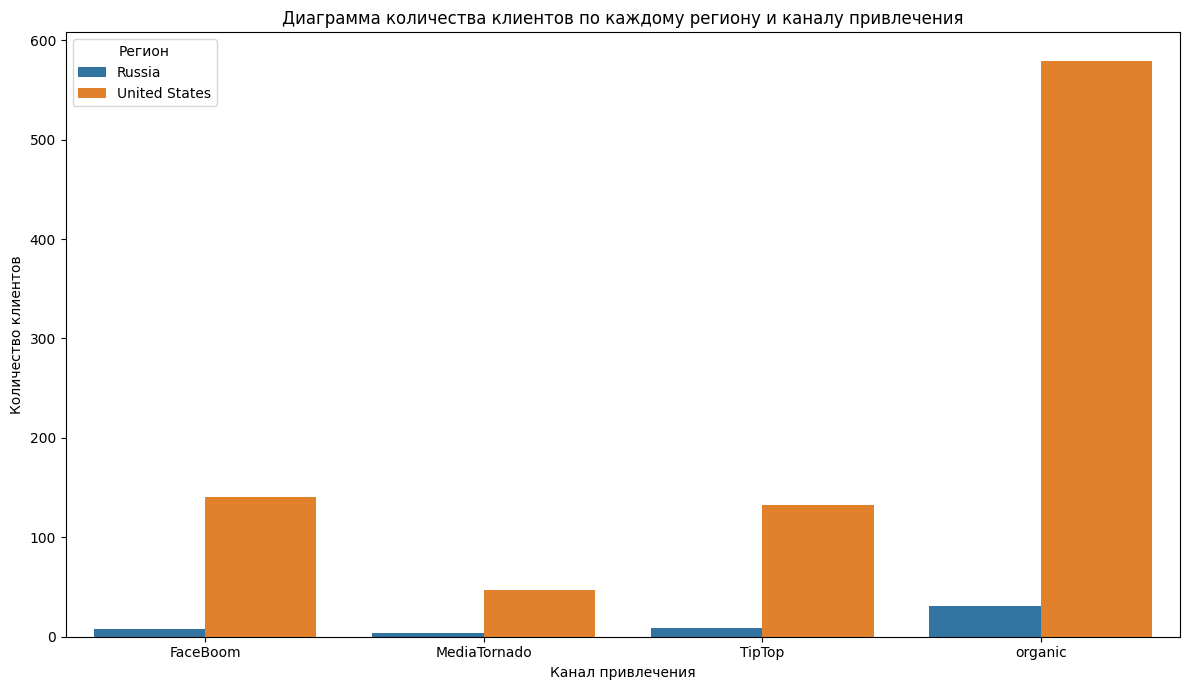

In [95]:
channel_region_counts = df.groupby(['channel', 'region']).size().reset_index(name='count')

plt.figure(figsize=(12, 7))
sns.barplot(data=channel_region_counts, x='channel', y='count', hue='region')
plt.title('Диаграмма количества клиентов по каждому региону и каналу привлечения')
plt.xlabel('Канал привлечения')
plt.ylabel('Количество клиентов')
plt.legend(title='Регион')
plt.tight_layout()
plt.show()


Из диаграммы можно сделать следующие выводы:

1. Общее количество клиентов: Наибольшее число клиентов по каждому каналу привлечения приходится на Соединенные Штаты (оранжевые столбцы), значительно превышая количество клиентов из России (синие столбцы).
3. Каналы привлечения:
 - FaceBoom: Около 150 клиентов из США и минимальное число из России.
 - MediaTornado: Примерно 50 клиентов из США и очень мало из России.
 - TipTop: Около 150 клиентов из США и небольшое количество из России.
 - organic: Около 50 клиентов из России и более 600 из США, что делает этот канал лидером по числу клиентов, особенно из США.

3. Сравнение стран: США доминируют по всем каналам, в то время как Россия имеет значительно меньшее представительство, особенно заметное в каналах FaceBoom, MediaTornado и TipTop.

Задание 2: Использовать pandas и plot. По сводной таблице (pivot_table) - отобразить уникальное (nunique) количество пользователей для каждого канала (channel). Оставить только маркеры в виде синего цвета размером 15.

Для выполнения второго индивидуального задания использован *plt.plot*, который строит диаграмму рассеяния. *marker='<'* задаёт форму точек (левый треугольник), *color='blue'* — цвет, *markersize=15* — размер точек, *linestyle='None'* отключает линии. *plt.figure(figsize=(10, 6))* устанавливает размер, *plt.grid(True, linestyle='-', alpha=0.7)* добавляет сетку, *plt.legend()* — легенду. *plt.title()*, *plt.xlabel()*, *plt.ylabel()* задают заголовок и подписи осей, *plt.xticks(rotation=90)* поворачивает метки, *plt.tight_layout()* и *plt.show()* обеспечивают корректное отображение.

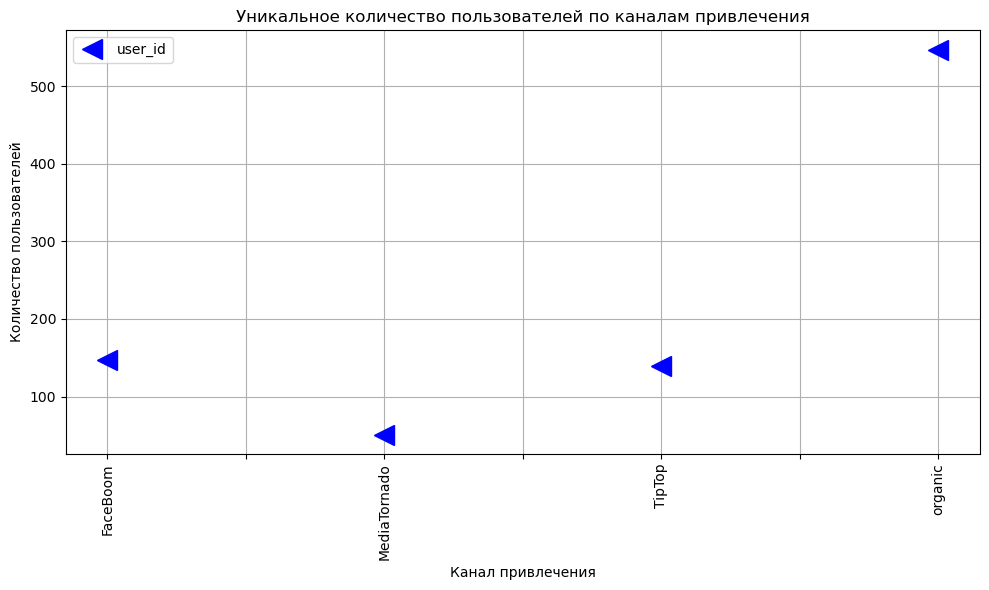

In [17]:
pivot = df.pivot_table(index='channel', values='user_id', aggfunc='nunique')

ax = pivot.plot(kind='line', marker='<', color='blue', markersize=15, linestyle='None', legend=False, figsize=(10, 6), grid=True)
plt.title('Уникальное количество пользователей по каналам привлечения')
plt.xlabel('Канал привлечения')
plt.ylabel('Количество пользователей')
plt.xticks(rotation=90)
plt.tight_layout()
plt.legend()
plt.show()

Общее количество пользователей: Наибольшее число уникальных пользователей приходится на канал органического привлечения (organic), превышающее 500 пользователей. Остальные каналы имеют значительно меньшие значения.
Распределение по каналам:

- FaceBoom: Около 150 пользователей.
- MediaTornado: Около 50 пользователей.
- TipTop: Около 100 пользователей.
- organic: Более 500 пользователей, что делает его лидером по количеству уникальных пользователей.


Общий вывод: Канал органического привлечения значительно превосходит остальные каналы по числу уникальных пользователей, тогда как FaceBoom, MediaTornado и TipTop привлекают существенно меньше пользователей (до 150 максимум).

Задание 3: Использовать matplotlib. Построить круговую диаграмму, которая отображает процент каждого устройства (device).

Для выполнения третьего индивидуального задания подсчитано количество записей для каждого уникального значения в столбце device с помощью *device_counts = df['device'].value_counts()*. *plt.figure(figsize=(20, 10))* задаёт размер фигуры. *plt.pie(device_counts, labels=device_counts.index, autopct='%1.1f%%', textprops={'size': 'x-large'}, startangle=90*) строит круговую диаграмму, где *labels=device_counts.index* задаёт метки, *autopct='%1.1f%%'* добавляет проценты с одним знаком после запятой, *textprops={'size': 'x-large'}* увеличивает шрифт процентов, *startangle=180* поворачивает диаграмму. *plt.title('Распределение устройств', fontsize=22)* устанавливает заголовок, *plt.legend(fontsize=20, bbox_to_anchor=(1, 1))* добавляет легенду, *plt.show()* отображает график.

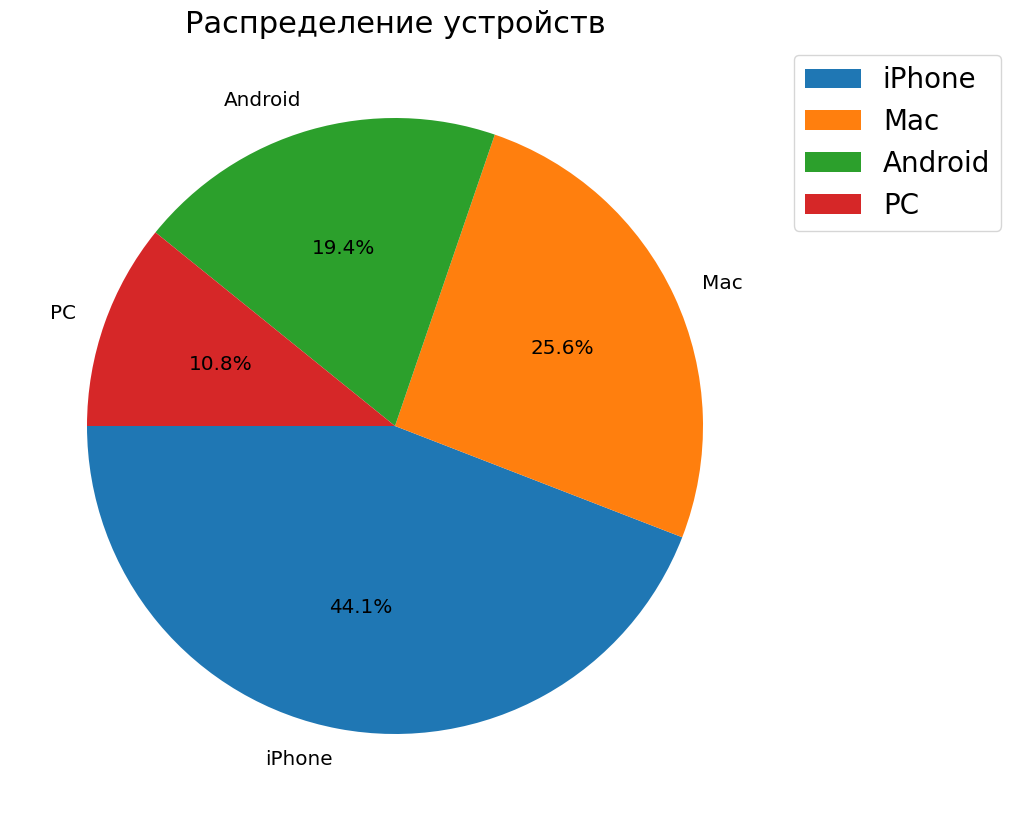

In [93]:
device_counts = df['device'].value_counts()

plt.figure(figsize=(20, 10))
plt.pie(device_counts, labels=device_counts.index, autopct='%1.1f%%', 
        textprops={'size': 'x-large'}, startangle=180)

plt.title('Распределение устройств', fontsize=22)
plt.legend(fontsize=20, bbox_to_anchor=(1, 1))
plt.show()

Наибольшую долю устройств составляют iPhone (44.1%) и Mac (25.6%), за которыми следуют Android (19.4%) и PC (10.8%), что указывает на преобладание Apple-устройств среди пользователей.

### 8. Построение графика типа hexagonal binning plot

Для выполнения задания создаётся гексагональная диаграмма рассеяния, показывающую плотность распределения пар время сессии и количество кликов из датасета. Цвета от светлого до тёмного синего указывают на количество точек в каждом шестиугольнике, а сетка и подписи помогают оценить связь между признаками. Это полезно для выявления областей высокой концентрации данных.

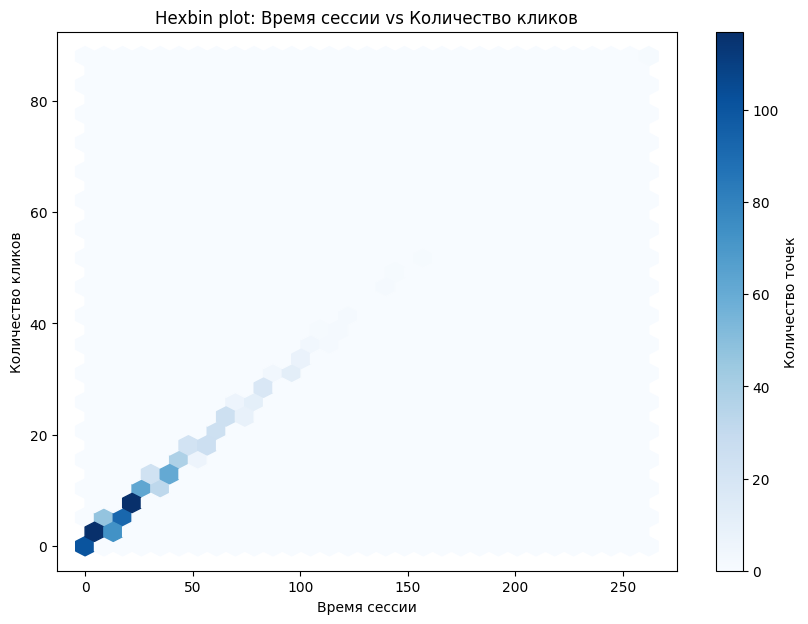

In [84]:
plt.figure(figsize=(10, 7))
plt.hexbin(df['time_session'], df['click_count'], gridsize=30, cmap='Blues')
plt.colorbar(label='Количество точек')
plt.xlabel('Время сессии')
plt.ylabel('Количество кликов')
plt.title('Hexbin plot: Время сессии vs Количество кликов')
plt.show()

На гексагональной диаграмме видно, что большинство пользователей имеют количество кликов в диапазоне 0-20 и время сессии до 50-100 единиц, с постепенным уменьшением плотности данных при увеличении обоих параметров, что указывает на преобладание коротких сессий с малым числом кликов.

### 9. Построение графика типа boxplot


Для выполнения задания создана коробчатая диаграмма, отображающая распределение цен из датасета. *plt.figure(figsize=(10, 6))* задаёт размер графика, *sns.boxplot(x=df['price'])* строит диаграмму, показывающую медианные значения, квартили и выбросы. *plt.title('Boxplot для цены')* устанавливает заголовок, *plt.xlabel('Цена')* добавляет подпись оси X, *plt.show()* отображает результат. Диаграмма помогает оценить вариации цен, с медианой около 4000, нижним и верхним квартилями в диапазоне 2000-7000 и наличием нескольких выбросов 15000.

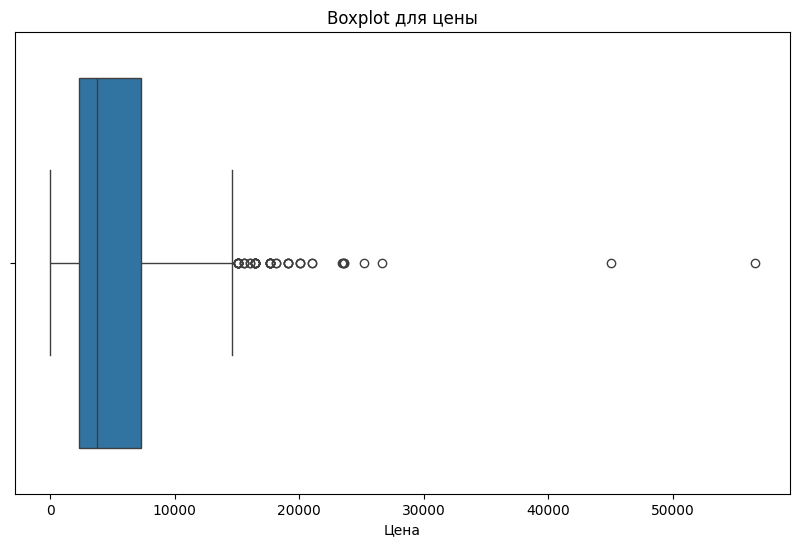

In [85]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['price'])
plt.title('Boxplot для цены')
plt.xlabel('Цена')
plt.show()

### 10. Добавление категоризации 

Для выполнения задания вычисляются первый (Q1) и третий (Q3) квантили для определения верхней и нижней границ среднего диапазона цен, что помогает разделить данные на категории. Создаётся новый столбец price_category в датафрейме с помощью *pd.qcut(df['price'], q=3, labels=['Низкая', 'Средняя', 'Высокая'])*, разбивая значения price на три интервала: от минимального до Q1 (Низкая), от Q1 до Q3 (Средняя), от Q3 до максимального (Высокая). *plt.figure(figsize=(10, 6))* задаёт размер графика, *sns.boxplot(x='price_category', y='price', data=df)* строит коробчатую диаграмму, отображающую распределение цен по категориям. *plt.title('Boxplot цен по категориям')* устанавливает заголовок, *plt.xlabel('Категория цены')* и *plt.ylabel('Цена')* добавляют подписи осей, *plt.show()* отображает результат.

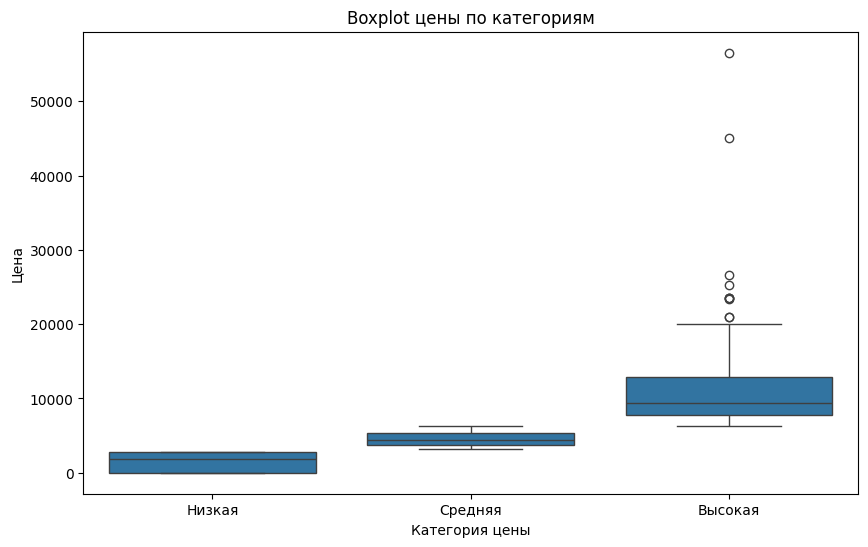

In [66]:
df['price_category'] = pd.qcut(df['price'], q=3, labels=['Низкая', 'Средняя', 'Высокая'])

plt.figure(figsize=(10, 6))
sns.boxplot(x='price_category', y='price', data=df)
plt.title('Boxplot цены по категориям')
plt.xlabel('Категория цены')
plt.ylabel('Цена')
plt.show()

У категории «Низкая» отсутствуют видимые усы, так как она включает только значения до первого квартиля (Q1). При построении boxplot значения этой группы находятся на нижней границе распределения, и диапазон возможных «усов» отсутствует — все точки либо внутри прямоугольника, либо совпадают с минимумом. Поэтому визуально усы не отображаются.

Диаграмма показывает, что медианные цены в категориях Низкая и Средняя находятся в диапазоне около 0-10000, тогда как Высокая категория имеет медиану около 12000 с заметными выбросами до 40,000-50,000, указывая на значительное разброс цен в верхнем сегменте.

Для построения диаграммы использован *plt.figure(figsize=(10, 6))* для задания размера графика. *sns.boxplot(x='device', y='price', data=df)* создаёт коробчатую диаграмму, где *x='device*' группирует данные по устройствам (iPhone, Mac, Android, PC), а *y='price'* отображает цены. *plt.title('Boxplot цен по устройствам', fontsize=16)* устанавливает заголовок, *plt.xlabel('Устройство', fontsize=14)* и *plt.ylabel('Цена', fontsize=14)* добавляют подписи осей, *plt.xticks(rotation=45)* поворачивает метки оси X, *plt.tight_layout()* оптимизирует расположение элементов, *plt.show()* отображает результат. Диаграмма показывает медианы, квартили и выбросы для цен по устройствам.

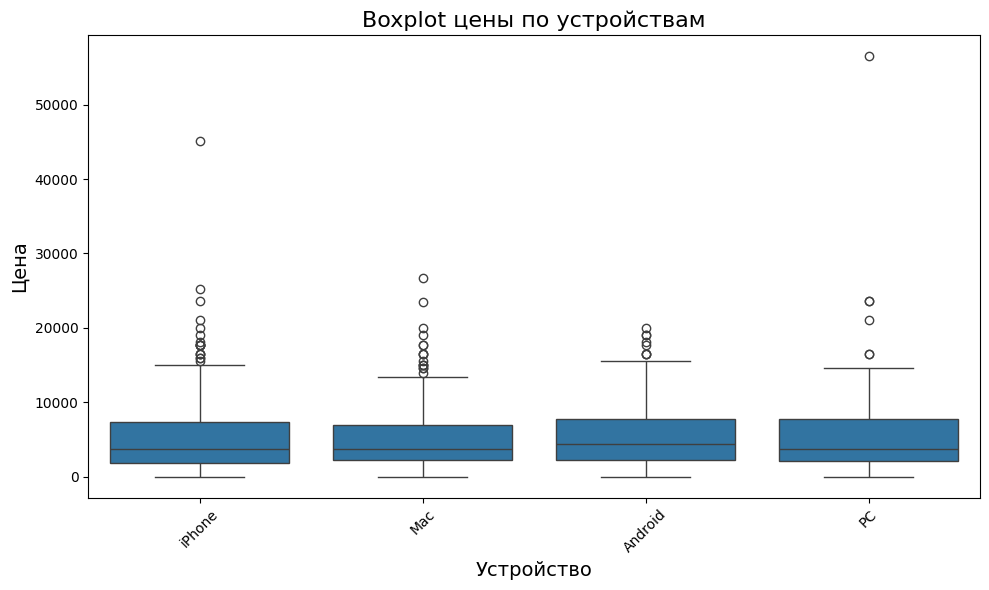

In [74]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='device', y='price', data=df)
plt.title('Boxplot цены по устройствам', fontsize=16)
plt.xlabel('Устройство', fontsize=14)
plt.ylabel('Цена', fontsize=14)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


Вывод: Медианные цены для всех устройств (iPhone, Mac, Android, PC) составляют около 5000, с размахом в диапазоне 0-15000. Выбросы наблюдаются до 30000-50000, особенно у Android и PC.

Для выполнения задания использован *plt.figure(figsize=(12, 6))* для задания размера графика. *sns.boxplot(x='channel', y='click_count', data=df)* строит коробчатую диаграмму, где *x='channel'* группирует данные по каналам привлечения *(organic, TipTop, Канал, FaceBoom, MediaTornado)*, а *y='click_count'* отображает количество кликов. *plt.title('Boxplot кликов по каналам', fontsize=16)* устанавливает заголовок, *plt.xlabel('Канал')* и *plt.ylabel('Количество кликов')* добавляют подписи осей, *plt.xticks(rotation=45)* поворачивает метки оси X, *plt.tight_layout()* оптимизирует расположение, *plt.show()* отображает результат. Диаграмма показывает медианы, квартили и выбросы для количества кликов по каналам.

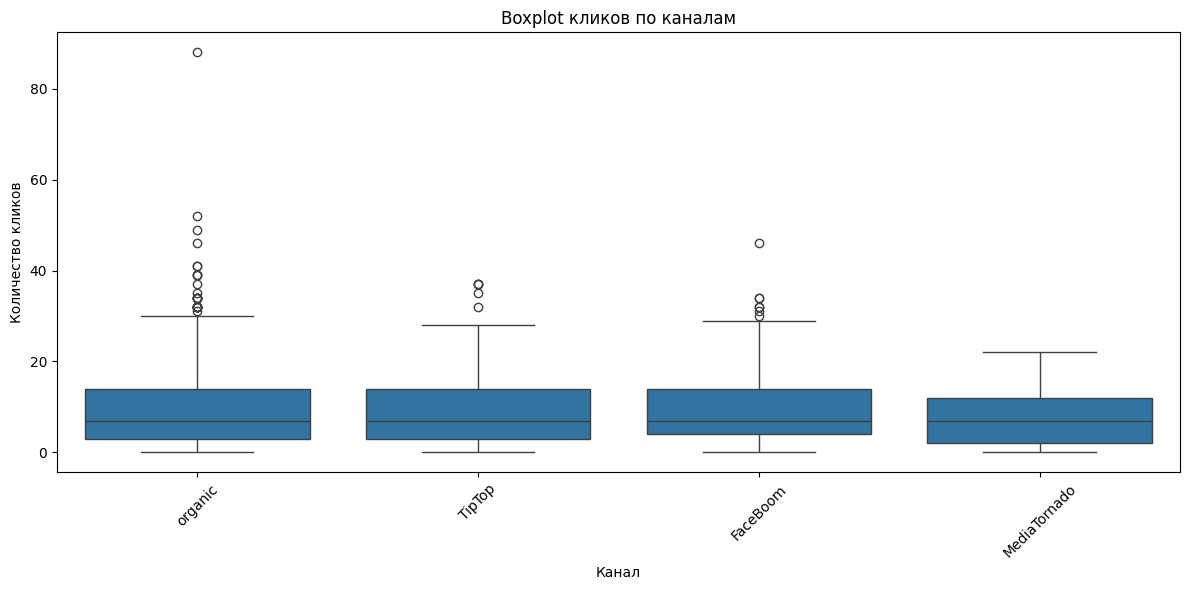

In [75]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='channel', y='click_count', data=df)
plt.title('Boxplot кликов по каналам')
plt.xlabel('Канал')
plt.ylabel('Количество кликов')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Блоки с усами количества кликов для всех каналов находятся в диапазоне 0-30. Выбросы достигают 30-60 кликов, особенно заметные у каналов organic и FaceBoom.

### Вывод

В ходе лабораторной работы был проанализирован набор данных, представляющий информацию о клиентах (количество кликов, время сессии, количество покупок, возраст, цена, устройство, регион, канал привлечения). Применялись методы предобработки данных, включая группировку и визуализацию. Построены диаграммы: гистограммы плотности для анализа распределения времени сессии, количества кликов и покупок, коробчатые диаграммы для цен по устройствам и кликов по каналам, а также круговые диаграммы для распределения устройств. 

Результаты показали, что большинство сессий короткие (до 100-200 единиц) с малым количеством кликов (до 50) и покупок (до 10), с пиком активности в возрасте 30-40 лет. Цены имеют медиану около 5000 с выбросами до 50000, особенно у Android и PC. Каналы органического привлечения и FaceBoom доминируют по числу пользователей (свыше 500 и около 150 соответственно), а устройства iPhone (44.1%) и Mac (25.6%) преобладают. Асимметрия в распределении цен и кликов указывает на наличие выбросов, а корреляция между временем сессии, кликами и покупками подтверждает их взаимосвязь. Как итог, данные отражают сегментированный рынок с преобладанием коротких сессий и низкой активности, где тип устройства и канал привлечения играют ключевую роль.